<a href="https://www.kaggle.com/code/fall2fire/animal-disease-prediction?scriptVersionId=277292254" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

## Libraries 

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

In [2]:
df=pd.read_csv('/kaggle/input/animal-disease-prediction/cleaned_animal_disease_prediction.csv')

# Data Analysis and Preprocessing 

In [3]:
df.head()

,Animal_Type,Breed,Age,Gender,Weight,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Duration,...,Diarrhea,Coughing,Labored_Breathing,Lameness,Skin_Lesions,Nasal_Discharge,Eye_Discharge,Body_Temperature,Heart_Rate,Disease_Prediction
0,Dog,Labrador,4,Male,25.0,Fever,Lethargy,Appetite Loss,Vomiting,3 days,...,No,No,No,No,No,No,No,39.5°C,120,Parvovirus
1,Cat,Siamese,2,Female,4.5,Coughing,Sneezing,Eye Discharge,Nasal Discharge,1 week,...,No,Yes,No,No,No,Yes,Yes,38.9°C,150,Upper Respiratory Infection
2,Cow,Holstein,3,Female,600.0,Fever,Nasal Discharge,Labored Breathing,Coughing,5 days,...,No,Yes,Yes,No,No,Yes,No,40.1°C,90,Foot and Mouth Disease
3,Dog,Beagle,1,Male,10.0,Diarrhea,Vomiting,Lethargy,Appetite Loss,2 days,...,Yes,No,No,No,No,No,No,39.2°C,130,Gastroenteritis
4,Cat,Persian,5,Male,3.8,Lethargy,Appetite Loss,Skin Lesions,No,2 weeks,...,No,No,No,No,Yes,No,No,38.7°C,160,Fungal Infection


In [4]:
df.isnull().sum()

Animal_Type           0
Breed                 0
Age                   0
Gender                0
Weight                0
Symptom_1             0
Symptom_2             0
Symptom_3             0
Symptom_4             0
Duration              0
Appetite_Loss         0
Vomiting              0
Diarrhea              0
Coughing              0
Labored_Breathing     0
Lameness              0
Skin_Lesions          0
Nasal_Discharge       0
Eye_Discharge         0
Body_Temperature      0
Heart_Rate            0
Disease_Prediction    0
dtype: int64

In [5]:
df.describe

<bound method NDFrame.describe of     Animal_Type            Breed  Age  Gender  Weight          Symptom_1  \
0           Dog         Labrador    4    Male    25.0              Fever   
1           Cat          Siamese    2  Female     4.5           Coughing   
2           Cow         Holstein    3  Female   600.0              Fever   
3           Dog           Beagle    1    Male    10.0           Diarrhea   
4           Cat          Persian    5    Male     3.8           Lethargy   
..          ...              ...  ...     ...     ...                ...   
426       Horse     Thoroughbred    6  Female   500.0           Coughing   
427         Dog  German Shepherd    3  Female    30.0           Lameness   
428         Cat       Maine Coon    2    Male     6.0           Vomiting   
429         Dog          Bulldog    5    Male    23.0  Labored Breathing   
430         Cow           Jersey    4  Female   580.0           Lethargy   

                Symptom_2          Symptom_3        S

In [6]:
df.shape

(431, 22)

In [7]:
df.columns

Index(['Animal_Type', 'Breed', 'Age', 'Gender', 'Weight', 'Symptom_1',
       'Symptom_2', 'Symptom_3', 'Symptom_4', 'Duration', 'Appetite_Loss',
       'Vomiting', 'Diarrhea', 'Coughing', 'Labored_Breathing', 'Lameness',
       'Skin_Lesions', 'Nasal_Discharge', 'Eye_Discharge', 'Body_Temperature',
       'Heart_Rate', 'Disease_Prediction'],
      dtype='object')

In [8]:
df.head(10)

,Animal_Type,Breed,Age,Gender,Weight,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Duration,...,Diarrhea,Coughing,Labored_Breathing,Lameness,Skin_Lesions,Nasal_Discharge,Eye_Discharge,Body_Temperature,Heart_Rate,Disease_Prediction
0,Dog,Labrador,4,Male,25.0,Fever,Lethargy,Appetite Loss,Vomiting,3 days,...,No,No,No,No,No,No,No,39.5°C,120,Parvovirus
1,Cat,Siamese,2,Female,4.5,Coughing,Sneezing,Eye Discharge,Nasal Discharge,1 week,...,No,Yes,No,No,No,Yes,Yes,38.9°C,150,Upper Respiratory Infection
2,Cow,Holstein,3,Female,600.0,Fever,Nasal Discharge,Labored Breathing,Coughing,5 days,...,No,Yes,Yes,No,No,Yes,No,40.1°C,90,Foot and Mouth Disease
3,Dog,Beagle,1,Male,10.0,Diarrhea,Vomiting,Lethargy,Appetite Loss,2 days,...,Yes,No,No,No,No,No,No,39.2°C,130,Gastroenteritis
4,Cat,Persian,5,Male,3.8,Lethargy,Appetite Loss,Skin Lesions,No,2 weeks,...,No,No,No,No,Yes,No,No,38.7°C,160,Fungal Infection
5,Horse,Thoroughbred,6,Female,500.0,Coughing,Labored Breathing,Nasal Discharge,Fever,10 days,...,No,Yes,Yes,No,No,Yes,No,39.8°C,85,Equine Influenza
6,Dog,German Shepherd,3,Female,30.0,Lameness,Fever,Skin Lesions,Lethargy,7 days,...,No,No,No,Yes,Yes,No,No,39.3°C,110,Lyme Disease
7,Cat,Maine Coon,2,Male,6.0,Vomiting,Appetite Loss,Lethargy,Diarrhea,4 days,...,Yes,No,No,No,No,No,No,39.1°C,140,Intestinal Parasites
8,Dog,Bulldog,5,Male,23.0,Labored Breathing,Coughing,Nasal Discharge,Appetite Loss,6 days,...,No,Yes,Yes,No,No,Yes,No,40.0°C,115,Canine Distemper
9,Cow,Jersey,4,Female,580.0,Lethargy,Decreased Milk Yield,Fever,No,8 days,...,No,No,No,No,No,No,No,39.6°C,70,Mastitis


In [9]:
df['Disease_Prediction'].value_counts()

Disease_Prediction
Bovine Tuberculosis               15
Bovine Respiratory Disease        14
Equine Influenza                  13
Canine Parvovirus                 12
Caprine Arthritis Encephalitis    12
                                  ..
Tuberculosis                       1
Equine Cushing's Disease           1
Respiratory Syncytial Virus        1
Canine Flu                         1
Porcine Circovirus Disease         1
Name: count, Length: 139, dtype: int64

In [10]:
df['Disease_Prediction'].unique()

array(['Parvovirus', 'Upper Respiratory Infection',
       'Foot and Mouth Disease', 'Gastroenteritis', 'Fungal Infection',
       'Equine Influenza', 'Lyme Disease', 'Intestinal Parasites',
       'Canine Distemper', 'Mastitis', 'Panleukopenia', 'Kennel Cough',
       'Strangles', 'Bovine Respiratory Disease', 'Canine Parvovirus',
       'Ringworm', 'Tick-Borne Disease', 'Arthritis',
       'Feline Herpesvirus', 'Equine Rhinopneumonitis', 'Feline Leukemia',
       'Heartworm Disease', 'Feline Infectious Peritonitis',
       'Equine Viral Arteritis', "Johne's Disease", 'Conjunctivitis',
       'Equine Piroplasmosis', 'Salmonellosis', 'Chronic Bronchitis',
       'Feline Upper Respiratory Infection', 'Equine Arthritis',
       'Equine Infectious Anemia', 'Bovine Viral Diarrhea',
       'Pancreatitis', 'Equine Pneumonia', 'Feline Calicivirus',
       'Laminitis', 'Cryptosporidiosis', 'Bordetella Infection',
       'Inflammatory Bowel Disease', 'Degenerative Joint Disease',
       'Bovine

In [11]:
print(df['Symptom_1'].value_counts(),"\n")
print(df['Symptom_2'].value_counts(),"\n")
print(df['Symptom_3'].value_counts(),"\n")
print(df['Symptom_4'].value_counts(),"\n")


Symptom_1
Coughing                141
Vomiting                 62
Lameness                 55
Lethargy                 52
Sneezing                 33
Nasal Discharge          23
Fever                    16
Diarrhea                 12
Appetite Loss             8
Swollen Joints            8
Eye Discharge             7
Weight Loss               7
Labored Breathing         3
Loss of Appetite          2
Skin Lesions              1
Decreased Milk Yield      1
Name: count, dtype: int64 

Symptom_2
Loss of Appetite           155
Diarrhea                    43
Nasal Discharge             41
Vomiting                    36
Lethargy                    23
Coughing                    21
Swollen Legs                21
Fever                       19
Labored Breathing           13
Appetite Loss               13
Swollen Joints              11
Eye Discharge                9
Sneezing                     6
Dehydration                  6
Weight Loss                  4
Decreased Milk Yield         3
Lameness

In [12]:
df['Animal_Type'].value_counts()

Animal_Type
Dog       75
Cat       72
Cow       68
Horse     66
Sheep     39
Goat      39
Pig       38
Rabbit    34
Name: count, dtype: int64

In [13]:
df['Duration'].value_counts()

Duration
5 days     133
4 days      87
6 days      83
3 days      47
7 days      30
8 days      14
2 days      11
10 days     10
1 week       6
2 weeks      5
9 days       4
12 days      1
Name: count, dtype: int64

In [14]:
df[['Breed','Animal_Type']].value_counts()

Breed              Animal_Type
Jersey             Cow            13
Arabian            Horse          12
Clydesdale         Horse          12
Thoroughbred       Horse          11
Maine Coon         Cat            11
                                  ..
Lincoln            Sheep           1
Manx               Cat             1
Nigerian Dwarf     Goat            1
Paint              Horse           1
Yorkshire Terrier  Dog             1
Name: count, Length: 121, dtype: int64

In [15]:
df['Breed'].unique()

array(['Labrador', 'Siamese', 'Holstein', 'Beagle', 'Persian',
       'Thoroughbred', 'German Shepherd', 'Maine Coon', 'Bulldog',
       'Jersey', 'Poodle', 'Bengal', 'Arabian', 'Hereford', 'Chihuahua',
       'Ragdoll', 'Siberian Husky', 'Clydesdale', 'British Shorthair',
       'Angus', 'Golden Retriever', 'Russian Blue', 'Quarter Horse',
       'Appaloosa', 'Dachshund', 'Sphynx', 'Abyssinian', 'Brahman',
       'Husky', 'Morgan', 'Limousin', 'Border Collie', 'Devon Rex',
       'Standardbred', 'Red Angus', 'Shire', 'Guernsey',
       'Labrador Retriever', 'Scottish Fold', 'Simmental', 'Rottweiler',
       'Siberian', 'American Quarter', 'Shorthorn', 'Shih Tzu',
       'American Curl', 'Percheron', 'Manx', 'Tennessee Walker',
       'Dalmatian', 'Bombay', 'Welsh Pony', 'Brown Swiss', 'Akita',
       'Boxer', 'Holland Lop', 'Merino', 'Boer', 'Yorkshire', 'Mini Rex',
       'Suffolk', 'Alpine', 'Duroc', 'Corgi', 'Burmese', 'Paint',
       'Flemish Giant', 'Dorper', 'Nubian', 'English A

In [16]:
df.drop(columns=['Breed','Symptom_1','Symptom_2','Symptom_3','Symptom_4'],inplace=True)

In [17]:
df.shape

(431, 17)

In [18]:
df.tail()

,Animal_Type,Age,Gender,Weight,Duration,Appetite_Loss,Vomiting,Diarrhea,Coughing,Labored_Breathing,Lameness,Skin_Lesions,Nasal_Discharge,Eye_Discharge,Body_Temperature,Heart_Rate,Disease_Prediction
426,Horse,6,Female,500.0,10 days,Yes,No,No,Yes,Yes,No,No,Yes,No,39.8°C,85,Equine Influenza
427,Dog,3,Female,30.0,7 days,Yes,No,No,No,No,Yes,Yes,No,No,39.3°C,110,Lyme Disease
428,Cat,2,Male,6.0,4 days,Yes,Yes,Yes,No,No,No,No,No,No,39.1°C,140,Intestinal Parasites
429,Dog,5,Male,23.0,6 days,Yes,No,No,Yes,Yes,No,No,Yes,No,40.0°C,115,Canine Distemper
430,Cow,4,Female,580.0,8 days,Yes,No,No,No,No,No,No,No,No,39.6°C,70,Mastitis


In [19]:
df['Body_Temperature'].value_counts()

Body_Temperature
39.2°C    57
39.4°C    54
39.3°C    50
39.5°C    46
39.0°C    41
39.6°C    40
39.1°C    37
39.7°C    23
39.8°C    14
38.9°C    14
38.8°C    12
38.7°C    11
39.9°C     9
38.6°C     9
40.0°C     6
38.5°C     4
40.1°C     2
40.2°C     1
38.4°C     1
Name: count, dtype: int64

## Feature Engineering in predicting column and creating new predicting feature i.e. Severity_Level

In [20]:
diseases = [
    'Parvovirus', 'Upper Respiratory Infection', 'Foot and Mouth Disease', 'Gastroenteritis',
    'Fungal Infection', 'Equine Influenza', 'Lyme Disease', 'Intestinal Parasites',
    'Canine Distemper', 'Mastitis', 'Panleukopenia', 'Kennel Cough', 'Strangles',
    'Bovine Respiratory Disease', 'Canine Parvovirus', 'Ringworm', 'Tick-Borne Disease',
    'Arthritis', 'Feline Herpesvirus', 'Equine Rhinopneumonitis', 'Feline Leukemia',
    'Heartworm Disease', 'Feline Infectious Peritonitis', 'Equine Viral Arteritis',
    "Johne's Disease", 'Conjunctivitis', 'Equine Piroplasmosis', 'Salmonellosis',
    'Chronic Bronchitis', 'Feline Upper Respiratory Infection', 'Equine Arthritis',
    'Equine Infectious Anemia', 'Bovine Viral Diarrhea', 'Pancreatitis', 'Equine Pneumonia',
    'Feline Calicivirus', 'Laminitis', 'Cryptosporidiosis', 'Bordetella Infection',
    'Inflammatory Bowel Disease', 'Degenerative Joint Disease', 'Bovine Leukemia Virus',
    'Allergic Rhinitis', 'Equine Leptospirosis', 'Bovine Coccidiosis', 'Feline Renal Disease',
    'Bovine Respiratory Syncytial Virus', 'Feline Viral Rhinotracheitis', 'Equine Laminitis',
    'Bovine Pneumonia', 'Feline Panleukopenia', 'Canine Flu', 'Respiratory Syncytial Virus',
    "Equine Cushing's Disease", 'Tuberculosis', 'Hyperthyroidism', 'Coccidiosis',
    'Canine Hepatitis', 'Equine Encephalitis', 'Bovine Influenza', 'Snuffles', 'Pneumonia',
    'Porcine Epidemic Diarrhea', 'Enteritis', 'Scrapie', 'Caprine Arthritis Encephalitis',
    'Swine Influenza', 'Equine Osteoarthritis', "Bovine Johne's Disease", 'Gastrointestinal Stasis',
    'Pasteurellosis', 'Giardiasis', 'Feline Respiratory Disease Complex', 'Equine Lyme Disease',
    'Bovine Tuberculosis', 'Rabbit Viral Hemorrhagic Disease', 'Foot-and-Mouth Disease',
    'Actinobacillus Pleuropneumonia', 'Feline Rhinotracheitis', 'Respiratory Infection',
    'Caprine Respiratory Disease', 'Swine Dysentery', 'Feline Respiratory Infection', 'Footrot',
    'Gastrointestinal Infection', 'Equine Metabolic Syndrome', 'Rabbit Hemorrhagic Disease',
    'Blue Tongue Virus', 'Feline Leukemia Virus', 'Myxomatosis', 'Caseous Lymphadenitis',
    'Caprine Pleuropneumonia', 'Leptospirosis', 'Rabbit Syphilis', 'Chlamydia in Sheep',
    'Actinobacillus Suis', 'Canine Leptospirosis', 'Feline Chlamydia', 'Equine West Nile Virus',
    'Equine Herpesvirus', 'Porcine Reproductive and Respiratory Syndrome', 'Canine Influenza',
    'Equine Protozoal Myeloencephalitis', 'Porcine Respiratory Disease Complex', 'Blue Tongue',
    'Feline Coronavirus', 'Contagious Ecthyma', 'Equine Encephalomyelitis',
    'Bovine Parainfluenza', 'Bluetongue Virus', 'Caprine Viral Arthritis', 'Feline Asthma',
    'Equine Influenza Virus', 'Rabbit Calicivirus', 'Maedi-Visna', 'Swine Erysipelas',
    'Blue Tongue Disease', 'Contagious Abortion', 'Caprine Arthritis', 'Swine Flu',
    'Canine Heartworm Disease', 'Bovine Respiratory Disease Complex', 'Swine Fever', 'Bluetongue',
    'Distemper', 'Feline Chlamydiosis', 'West Nile Virus', 'Canine Cough',
    'Caprine Arthritis Encephalitis Virus', 'African Swine Fever', 'Viral Hemorrhagic Disease',
    'Scrapie Disease', 'Feline Immunodeficiency Virus', 'Bovine Mastitis', 'Goat Pox',
    'Porcine Epidemic Diarrhea Virus', 'Canine Infectious Hepatitis', 'Feline Panleukopenia Virus',
    'Porcine Circovirus Disease'
]

# Base severity map (manually categorized)
severity_map = {
    "Low": [
        'Allergic Rhinitis', 'Conjunctivitis', 'Ringworm', 'Arthritis',
        'Feline Chlamydia', 'Feline Asthma', 'Footrot', 'Snuffles',
        'Pasteurellosis', 'Gastrointestinal Stasis', 'Fungal Infection'
    ],
    "Moderate": [
        'Gastroenteritis', 'Pancreatitis', 'Kennel Cough', 'Enteritis',
        'Caprine Respiratory Disease', 'Inflammatory Bowel Disease',
        'Equine Arthritis', 'Caprine Arthritis', 'Equine Laminitis',
        'Swine Dysentery', 'Caprine Pleuropneumonia', 'Equine Piroplasmosis'
    ],
    "High": [
        'Upper Respiratory Infection', 'Bordetella Infection', 'Feline Calicivirus',
        'Equine Influenza', 'Canine Influenza', 'Equine Rhinopneumonitis',
        'Feline Upper Respiratory Infection', 'Feline Respiratory Infection',
        'Porcine Respiratory Disease Complex', 'Respiratory Infection',
        'Equine Pneumonia', 'Laminitis', 'Leptospirosis', 'Caprine Viral Arthritis',
        'Canine Cough'
    ],
    "Critical": [
        'Parvovirus', 'Canine Parvovirus', 'Canine Distemper', 'Feline Panleukopenia',
        'Panleukopenia', 'Rabbit Hemorrhagic Disease', 'Rabbit Viral Hemorrhagic Disease',
        'African Swine Fever', 'Swine Flu', 'Swine Fever', 'Scrapie', 'Myxomatosis',
        'Feline Leukemia Virus', 'Blue Tongue Disease', 'Distemper', 'Feline Coronavirus',
        'Equine Encephalitis', 'Porcine Epidemic Diarrhea', 'Porcine Circovirus Disease',
        'Blue Tongue', 'Foot and Mouth Disease', 'Foot-and-Mouth Disease',
        'Porcine Reproductive and Respiratory Syndrome', 'Viral Hemorrhagic Disease'
    ],
    "Chronic": [
        'Heartworm Disease', 'Canine Heartworm Disease', 'Feline Immunodeficiency Virus',
        'Feline Renal Disease', 'Caprine Arthritis Encephalitis', "Johne's Disease",
        "Bovine Johne's Disease", "Equine Cushing's Disease", 'Hyperthyroidism',
        'Equine Infectious Anemia', 'Chronic Bronchitis', 'Degenerative Joint Disease',
        'Bovine Leukemia Virus', 'Maedi-Visna', 'Equine Metabolic Syndrome',
        'Caprine Arthritis Encephalitis Virus', 'Feline Infectious Peritonitis'
    ]
}

# Reverse map: disease -> severity
disease_to_severity = {disease: level for level, group in severity_map.items() for disease in group}

# Heuristic-based fallback assignment
def heuristic_categorize(disease):
    disease = disease.lower()
    if "hemorrhagic" in disease or "encephalitis" in disease or "tuberculosis" in disease or "virus" in disease:
        return "Critical"
    elif "flu" in disease or "influenza" in disease or "syncytial" in disease or "rhinotracheitis" in disease:
        return "High"
    elif "arthritis" in disease or "joint" in disease:
        return "Chronic"
    elif "infection" in disease or "cough" in disease or "parasite" in disease:
        return "Moderate"
    else:
        return "Low"

# Map all diseases
df['Severity_Level'] = df['Disease_Prediction'].apply(
    lambda d: disease_to_severity.get(d, heuristic_categorize(d))
)

In [21]:
df['Severity_Level'].value_counts()

Severity_Level
Critical    148
Low         117
High         64
Chronic      54
Moderate     48
Name: count, dtype: int64

In [22]:
df['Severity_Level'].isnull().sum()

0

In [23]:
df.head()

,Animal_Type,Age,Gender,Weight,Duration,Appetite_Loss,Vomiting,Diarrhea,Coughing,Labored_Breathing,Lameness,Skin_Lesions,Nasal_Discharge,Eye_Discharge,Body_Temperature,Heart_Rate,Disease_Prediction,Severity_Level
0,Dog,4,Male,25.0,3 days,Yes,Yes,No,No,No,No,No,No,No,39.5°C,120,Parvovirus,Critical
1,Cat,2,Female,4.5,1 week,No,No,No,Yes,No,No,No,Yes,Yes,38.9°C,150,Upper Respiratory Infection,High
2,Cow,3,Female,600.0,5 days,Yes,No,No,Yes,Yes,No,No,Yes,No,40.1°C,90,Foot and Mouth Disease,Critical
3,Dog,1,Male,10.0,2 days,Yes,Yes,Yes,No,No,No,No,No,No,39.2°C,130,Gastroenteritis,Moderate
4,Cat,5,Male,3.8,2 weeks,Yes,No,No,No,No,No,Yes,No,No,38.7°C,160,Fungal Infection,Low


In [24]:
df['Body_Temperature'].value_counts()

Body_Temperature
39.2°C    57
39.4°C    54
39.3°C    50
39.5°C    46
39.0°C    41
39.6°C    40
39.1°C    37
39.7°C    23
39.8°C    14
38.9°C    14
38.8°C    12
38.7°C    11
39.9°C     9
38.6°C     9
40.0°C     6
38.5°C     4
40.1°C     2
40.2°C     1
38.4°C     1
Name: count, dtype: int64

In [25]:
df['Heart_Rate'].unique()

array([120, 150,  90, 130, 160,  85, 110, 140, 115,  70,  75,  80, 155,
       125, 135, 145,  78,  82, 132,  76,  79, 138, 126, 142,  81, 124,
       148,  77, 129, 146,  83, 131, 143,  74,  84,  72,  86, 118, 147,
       137, 127, 144, 133, 128,  71,  87, 149, 134, 139, 165,  88, 119,
       123, 153, 154, 158, 122,  95, 100,  92, 105])

In [26]:
df['Body_Temperature'] = df['Body_Temperature'].str.replace('°C', '').astype(float)
# Categorization function
def categorize_temp(t):
    if t < 37.5:
        return 0 #'Hypothermia below 37.5°C'
    elif 37.5 <= t <= 39.2:
        return 1  #'Normal between 37.5-39.2°C'
    elif 39.3 <= t <= 39.7:
        return 2 #'Mild Fever between 39.3-39.7°C'
    elif 39.8 <= t <= 40.2:
        return 3 #'High Fever between 39.8-40.2°C'
    else:
        return 4 #'Hyperpyrexia above 40.2°C'

def categorize_hr(hr):
    if hr < 80:
        return 0 #'Bradycardia below 80'
    elif 80 <= hr <= 120:
        return 1 #'Normal between 80-120 '
    elif 121 <= hr <= 140:
        return 2 #'Elevated between 121-140'
    elif 141 <= hr <= 160:
        return 3 #'High between 141-160'
    else:
        return 4 #'Critical above 160'

df['Temperature_Category'] = df['Body_Temperature'].apply(categorize_temp)
df['Heart_Rate_Category'] = df['Heart_Rate'].apply(categorize_hr)




## Creating more features for classifying them into categories and label encoding them.....

In [27]:
df.head(10)

,Animal_Type,Age,Gender,Weight,Duration,Appetite_Loss,Vomiting,Diarrhea,Coughing,Labored_Breathing,Lameness,Skin_Lesions,Nasal_Discharge,Eye_Discharge,Body_Temperature,Heart_Rate,Disease_Prediction,Severity_Level,Temperature_Category,Heart_Rate_Category
0,Dog,4,Male,25.0,3 days,Yes,Yes,No,No,No,No,No,No,No,39.5,120,Parvovirus,Critical,2,1
1,Cat,2,Female,4.5,1 week,No,No,No,Yes,No,No,No,Yes,Yes,38.9,150,Upper Respiratory Infection,High,1,3
2,Cow,3,Female,600.0,5 days,Yes,No,No,Yes,Yes,No,No,Yes,No,40.1,90,Foot and Mouth Disease,Critical,3,1
3,Dog,1,Male,10.0,2 days,Yes,Yes,Yes,No,No,No,No,No,No,39.2,130,Gastroenteritis,Moderate,1,2
4,Cat,5,Male,3.8,2 weeks,Yes,No,No,No,No,No,Yes,No,No,38.7,160,Fungal Infection,Low,1,3
5,Horse,6,Female,500.0,10 days,Yes,No,No,Yes,Yes,No,No,Yes,No,39.8,85,Equine Influenza,High,3,1
6,Dog,3,Female,30.0,7 days,Yes,No,No,No,No,Yes,Yes,No,No,39.3,110,Lyme Disease,Low,2,1
7,Cat,2,Male,6.0,4 days,Yes,Yes,Yes,No,No,No,No,No,No,39.1,140,Intestinal Parasites,Moderate,1,2
8,Dog,5,Male,23.0,6 days,Yes,No,No,Yes,Yes,No,No,Yes,No,40.0,115,Canine Distemper,Critical,3,1
9,Cow,4,Female,580.0,8 days,Yes,No,No,No,No,No,No,No,No,39.6,70,Mastitis,Low,2,0


In [28]:
df['Heart_Rate_Category'].isnull().sum()
df['Heart_Rate_Category'].value_counts()

Heart_Rate_Category
1    210
0     78
2     76
3     66
4      1
Name: count, dtype: int64

In [29]:
df['Temperature_Category'].isnull().sum()
df['Temperature_Category'].value_counts()

Temperature_Category
2    213
1    186
3     32
Name: count, dtype: int64

In [30]:
df.drop(columns="Disease_Prediction",inplace=True)

In [31]:
df.shape

(431, 19)

In [32]:
df['Gender']=df['Gender'].map({'Male':0,'Female':1})
df['Appetite_Loss']=df['Appetite_Loss'].map({'No':0,'Yes':1})
df['Vomiting']=df['Vomiting'].map({'No':0,'Yes':1})
df['Diarrhea']=df['Diarrhea'].map({'No':0,'Yes':1})
df['Coughing']=df['Coughing'].map({'No':0,'Yes':1})
df['Labored_Breathing']=df['Labored_Breathing'].map({'No':0,'Yes':1})
df['Lameness']=df['Lameness'].map({'No':0,'Yes':1})
df['Skin_Lesions']=df['Skin_Lesions'].map({'No':0,'Yes':1})
df['Nasal_Discharge']=df['Nasal_Discharge'].map({'No':0,'Yes':1})
df['Eye_Discharge']=df['Eye_Discharge'].map({'No':0,'Yes':1})

In [33]:
df.head()

,Animal_Type,Age,Gender,Weight,Duration,Appetite_Loss,Vomiting,Diarrhea,Coughing,Labored_Breathing,Lameness,Skin_Lesions,Nasal_Discharge,Eye_Discharge,Body_Temperature,Heart_Rate,Severity_Level,Temperature_Category,Heart_Rate_Category
0,Dog,4,0,25.0,3 days,1,1,0,0,0,0,0,0,0,39.5,120,Critical,2,1
1,Cat,2,1,4.5,1 week,0,0,0,1,0,0,0,1,1,38.9,150,High,1,3
2,Cow,3,1,600.0,5 days,1,0,0,1,1,0,0,1,0,40.1,90,Critical,3,1
3,Dog,1,0,10.0,2 days,1,1,1,0,0,0,0,0,0,39.2,130,Moderate,1,2
4,Cat,5,0,3.8,2 weeks,1,0,0,0,0,0,1,0,0,38.7,160,Low,1,3


In [34]:
# Function to convert all durations to number of days
def parse_duration(val):
    val = val.strip().lower()
    if 'day' in val:
        return int(val.split()[0])
    elif 'week' in val:
        return int(val.split()[0]) * 7
    return None  

# Convert to integer days
df['Duration'] = df['Duration'].apply(parse_duration)

# Categorize durations
def categorize_duration(days):
    if days <= 3:
        return '1-3 days'
    elif 4 <= days <= 7:
        return '4-7 days'
    elif 8 <= days <= 14:
        return '8-14 days'
    else:
        return 'More than 14 days'

# Apply category
df['Duration'] = df['Duration'].apply(categorize_duration)

In [35]:
df.head()

,Animal_Type,Age,Gender,Weight,Duration,Appetite_Loss,Vomiting,Diarrhea,Coughing,Labored_Breathing,Lameness,Skin_Lesions,Nasal_Discharge,Eye_Discharge,Body_Temperature,Heart_Rate,Severity_Level,Temperature_Category,Heart_Rate_Category
0,Dog,4,0,25.0,1-3 days,1,1,0,0,0,0,0,0,0,39.5,120,Critical,2,1
1,Cat,2,1,4.5,4-7 days,0,0,0,1,0,0,0,1,1,38.9,150,High,1,3
2,Cow,3,1,600.0,4-7 days,1,0,0,1,1,0,0,1,0,40.1,90,Critical,3,1
3,Dog,1,0,10.0,1-3 days,1,1,1,0,0,0,0,0,0,39.2,130,Moderate,1,2
4,Cat,5,0,3.8,8-14 days,1,0,0,0,0,0,1,0,0,38.7,160,Low,1,3


In [36]:
df['Duration'].isnull().sum()

0

In [37]:
df.drop(columns=["Body_Temperature","Heart_Rate"],inplace=True)

In [38]:
df.shape
df.head()

,Animal_Type,Age,Gender,Weight,Duration,Appetite_Loss,Vomiting,Diarrhea,Coughing,Labored_Breathing,Lameness,Skin_Lesions,Nasal_Discharge,Eye_Discharge,Severity_Level,Temperature_Category,Heart_Rate_Category
0,Dog,4,0,25.0,1-3 days,1,1,0,0,0,0,0,0,0,Critical,2,1
1,Cat,2,1,4.5,4-7 days,0,0,0,1,0,0,0,1,1,High,1,3
2,Cow,3,1,600.0,4-7 days,1,0,0,1,1,0,0,1,0,Critical,3,1
3,Dog,1,0,10.0,1-3 days,1,1,1,0,0,0,0,0,0,Moderate,1,2
4,Cat,5,0,3.8,8-14 days,1,0,0,0,0,0,1,0,0,Low,1,3


In [39]:
from sklearn.preprocessing import LabelEncoder

le_animal = LabelEncoder()
df['Animal_Type'] = le_animal.fit_transform(df['Animal_Type'])
le_severity = LabelEncoder()
df['Severity_Level'] = le_severity.fit_transform(df['Severity_Level'])
le_duration = LabelEncoder()
df['Duration'] = le_duration.fit_transform(df['Duration'])

# Dictionary of encodings
animal_type_encoding = dict(zip(le_animal.classes_, le_animal.transform(le_animal.classes_)))
print("Animal_Type Encoding:", animal_type_encoding)
severity_encoding = dict(zip(le_severity.classes_, le_severity.transform(le_severity.classes_)))
print("Severity Encoding:", severity_encoding)
duration_encoding = dict(zip(le_duration.classes_, le_duration.transform(le_duration.classes_)))
print("Duration Encoding:", duration_encoding)

Animal_Type Encoding: {'Cat': 0, 'Cow': 1, 'Dog': 2, 'Goat': 3, 'Horse': 4, 'Pig': 5, 'Rabbit': 6, 'Sheep': 7}
Severity Encoding: {'Chronic': 0, 'Critical': 1, 'High': 2, 'Low': 3, 'Moderate': 4}
Duration Encoding: {'1-3 days': 0, '4-7 days': 1, '8-14 days': 2}


In [40]:
df.head(20)

,Animal_Type,Age,Gender,Weight,Duration,Appetite_Loss,Vomiting,Diarrhea,Coughing,Labored_Breathing,Lameness,Skin_Lesions,Nasal_Discharge,Eye_Discharge,Severity_Level,Temperature_Category,Heart_Rate_Category
0,2,4,0,25.0,0,1,1,0,0,0,0,0,0,0,1,2,1
1,0,2,1,4.5,1,0,0,0,1,0,0,0,1,1,2,1,3
2,1,3,1,600.0,1,1,0,0,1,1,0,0,1,0,1,3,1
3,2,1,0,10.0,0,1,1,1,0,0,0,0,0,0,4,1,2
4,0,5,0,3.8,2,1,0,0,0,0,0,1,0,0,3,1,3
5,4,6,1,500.0,2,1,0,0,1,1,0,0,1,0,2,3,1
6,2,3,1,30.0,1,1,0,0,0,0,1,1,0,0,3,2,1
7,0,2,0,6.0,1,1,1,1,0,0,0,0,0,0,4,1,2
8,2,5,0,23.0,1,1,0,0,1,1,0,0,1,0,1,3,1
9,1,4,1,580.0,2,1,0,0,0,0,0,0,0,0,3,2,0


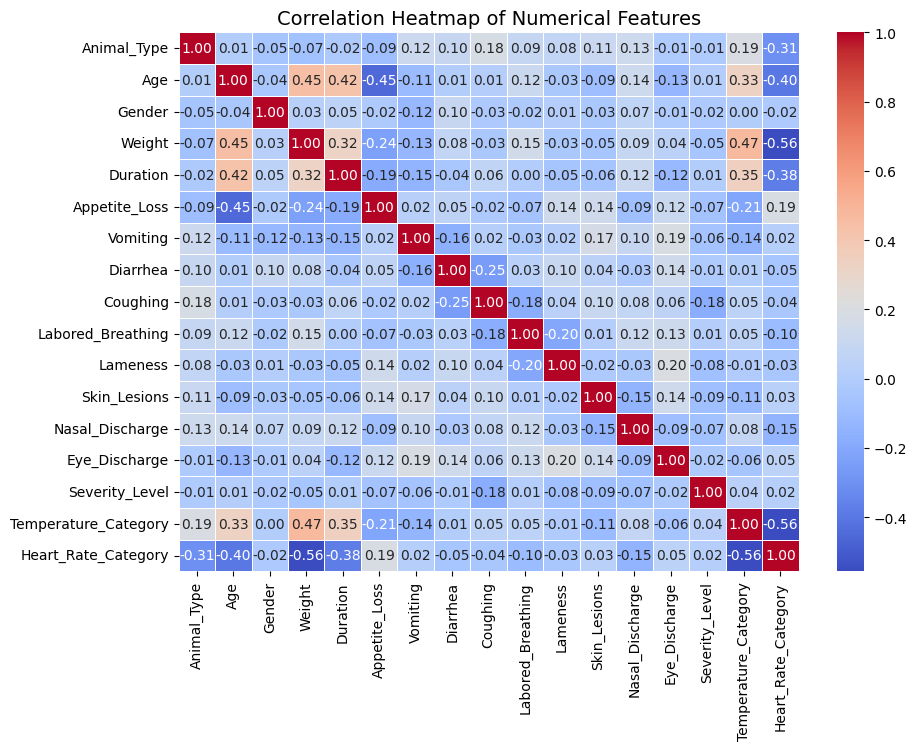

In [41]:
corr_matrix = df.corr()

plt.figure(figsize=(10,7))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap of Numerical Features', fontsize=14)
plt.show()

In [42]:
df.to_csv("Preprocessed-data.csv")

# New Preprocessed Data 

In [43]:
df=pd.read_csv('/kaggle/working/Preprocessed-data.csv')

In [44]:
df.head()

,Unnamed: 0,Animal_Type,Age,Gender,Weight,Duration,Appetite_Loss,Vomiting,Diarrhea,Coughing,Labored_Breathing,Lameness,Skin_Lesions,Nasal_Discharge,Eye_Discharge,Severity_Level,Temperature_Category,Heart_Rate_Category
0,0,2,4,0,25.0,0,1,1,0,0,0,0,0,0,0,1,2,1
1,1,0,2,1,4.5,1,0,0,0,1,0,0,0,1,1,2,1,3
2,2,1,3,1,600.0,1,1,0,0,1,1,0,0,1,0,1,3,1
3,3,2,1,0,10.0,0,1,1,1,0,0,0,0,0,0,4,1,2
4,4,0,5,0,3.8,2,1,0,0,0,0,0,1,0,0,3,1,3


In [45]:
df.shape

(431, 18)

In [46]:
df.drop(columns=['Unnamed: 0'],inplace=True)

<Axes: xlabel='Weight'>

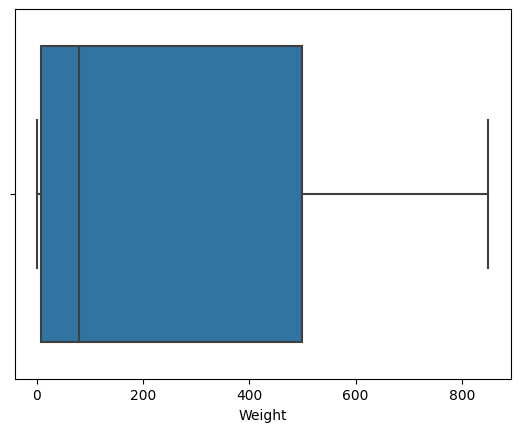

In [47]:
sns.boxplot(x=df['Weight'])

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Weight', ylabel='Count'>

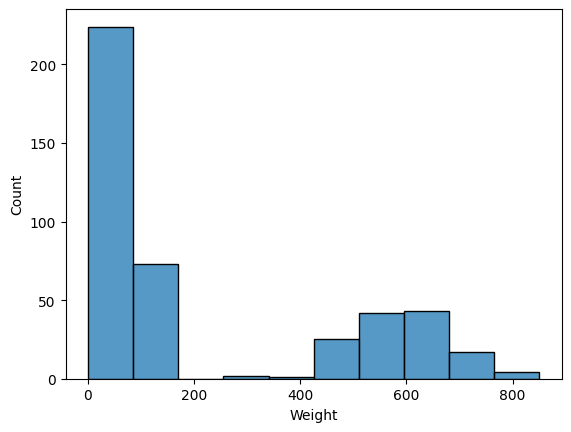

In [48]:
sns.histplot(x=df['Weight'])

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Severity_Level', ylabel='Count'>

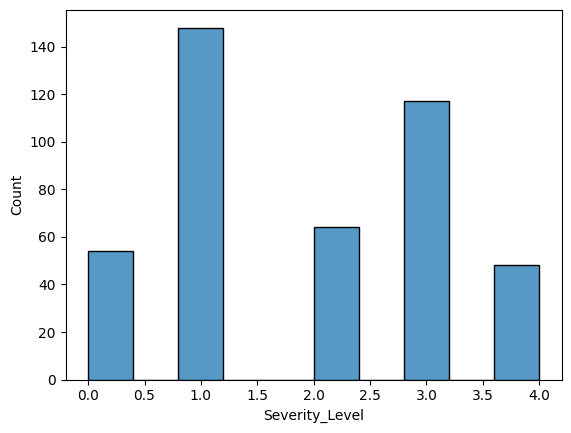

In [49]:
sns.histplot(x=df['Severity_Level'])

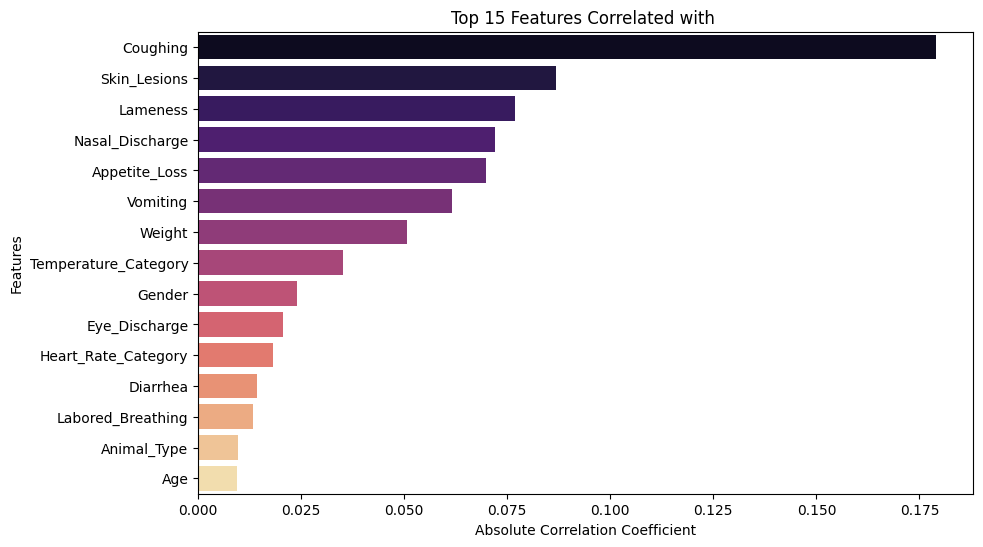

In [50]:
target_corr = df.corr()['Severity_Level'].abs().sort_values(ascending=False)[1:16]

plt.figure(figsize=(10, 6))
sns.barplot(x=target_corr.values, y=target_corr.index, palette='magma')
plt.title('Top 15 Features Correlated with ')
plt.xlabel('Absolute Correlation Coefficient')
plt.ylabel('Features')
plt.show()

In [51]:
# Select top 15 most correlated features with target
top_features = (
    df.corr()['Severity_Level']
    .abs()
    .sort_values(ascending=False)
    .index[1:16]   # skip the target 
)

print("Top correlated features:", list(top_features))

Top correlated features: ['Coughing', 'Skin_Lesions', 'Lameness', 'Nasal_Discharge', 'Appetite_Loss', 'Vomiting', 'Weight', 'Temperature_Category', 'Gender', 'Eye_Discharge', 'Heart_Rate_Category', 'Diarrhea', 'Labored_Breathing', 'Animal_Type', 'Age']


In [52]:
# Separating data and label
x=df[top_features]
y=df['Severity_Level']
print(x,"\n")
print(y)

     Coughing  Skin_Lesions  Lameness  Nasal_Discharge  Appetite_Loss  \
0           0             0         0                0              1   
1           1             0         0                1              0   
2           1             0         0                1              1   
3           0             0         0                0              1   
4           0             1         0                0              1   
..        ...           ...       ...              ...            ...   
426         1             0         0                1              1   
427         0             1         1                0              1   
428         0             0         0                0              1   
429         1             0         0                1              1   
430         0             0         0                0              1   

     Vomiting  Weight  Temperature_Category  Gender  Eye_Discharge  \
0           1    25.0                     2       0  

# Standardization of data using standard scaler 

In [53]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(x)
sdata=scaler.transform(x)
print(sdata)
x=sdata
print(x)
print(y)

[[-1.41914975 -1.11570232 -1.15313908 ... -1.10011654 -0.42053592
  -0.40932879]
 [ 0.70464727 -1.11570232 -1.15313908 ... -1.10011654 -1.31781802
  -1.19342084]
 [ 0.70464727 -1.11570232 -1.15313908 ...  0.9089946  -0.86917697
  -0.80137482]
 ...
 [-1.41914975 -1.11570232 -1.15313908 ... -1.10011654 -1.31781802
  -1.19342084]
 [ 0.70464727 -1.11570232 -1.15313908 ...  0.9089946  -0.42053592
  -0.01728277]
 [-1.41914975 -1.11570232 -1.15313908 ... -1.10011654 -0.86917697
  -0.40932879]]
[[-1.41914975 -1.11570232 -1.15313908 ... -1.10011654 -0.42053592
  -0.40932879]
 [ 0.70464727 -1.11570232 -1.15313908 ... -1.10011654 -1.31781802
  -1.19342084]
 [ 0.70464727 -1.11570232 -1.15313908 ...  0.9089946  -0.86917697
  -0.80137482]
 ...
 [-1.41914975 -1.11570232 -1.15313908 ... -1.10011654 -1.31781802
  -1.19342084]
 [ 0.70464727 -1.11570232 -1.15313908 ...  0.9089946  -0.42053592
  -0.01728277]
 [-1.41914975 -1.11570232 -1.15313908 ... -1.10011654 -0.86917697
  -0.40932879]]
0      1
1      

# spliting of data for test and train i.e.25% and 75% respectively

In [54]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.25,stratify=y,random_state=42)
print(x.shape,xtrain.shape,xtest.shape)

(431, 15) (323, 15) (108, 15)


# Trying different ML algorithms for best classification result 

In [55]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix,accuracy_score
model=DecisionTreeClassifier()
model.fit(xtrain,ytrain)
ypred=model.predict(xtest)
accuracy=accuracy_score(ytest,ypred)
print("Decision Tree test accuracy")
print(accuracy)
cm = confusion_matrix(ytest, ypred)
print("\nConfusion Matrix:")
print(cm)

Decision Tree test accuracy
0.3333333333333333

Confusion Matrix:
[[ 4  2  4  4  0]
 [ 5 15  6 11  0]
 [ 2  5  3  5  1]
 [ 6  6  1 12  4]
 [ 0  2  5  3  2]]


In [56]:
from sklearn.metrics import classification_report

print(classification_report(ytest, ypred, target_names=['0','1','2','3','4']))

              precision    recall  f1-score   support

           0       0.24      0.29      0.26        14
           1       0.50      0.41      0.45        37
           2       0.16      0.19      0.17        16
           3       0.34      0.41      0.38        29
           4       0.29      0.17      0.21        12

    accuracy                           0.33       108
   macro avg       0.30      0.29      0.29       108
weighted avg       0.35      0.33      0.34       108



In [57]:
from sklearn import svm
classifier =svm.SVC(kernel='linear')
#training the support vector machine classifier
classifier.fit(xtrain,ytrain)
#Accuracy score on Training data
xtrain_acc_prediction=classifier.predict(xtrain)
training_data_acc=accuracy_score(xtrain_acc_prediction,ytrain)
print('Accuracy Score of training data:',training_data_acc)
#Accuracy score on Test data
xtest_acc_prediction=classifier.predict(xtest)
test_data_acc=accuracy_score(xtest_acc_prediction,ytest)
print('Accuracy Score of test data:',test_data_acc)

from sklearn.metrics import classification_report

print(classification_report(ytest,xtest_acc_prediction , target_names=['0','1','2','3','4']))

Accuracy Score of training data: 0.47678018575851394
Accuracy Score of test data: 0.3425925925925926
              precision    recall  f1-score   support

           0       0.29      0.14      0.19        14
           1       0.37      0.59      0.45        37
           2       0.12      0.06      0.08        16
           3       0.35      0.31      0.33        29
           4       0.43      0.25      0.32        12

    accuracy                           0.34       108
   macro avg       0.31      0.27      0.27       108
weighted avg       0.32      0.34      0.32       108



In [58]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(class_weight='balanced')
model.fit(xtrain,ytrain)
ypred=model.predict(xtest)
accuracy=accuracy_score(ytest,ypred)
print("Decision Tree test accuracy")
print(accuracy)
cm = confusion_matrix(ytest, ypred)
print("\nConfusion Matrix:")
print(cm)

print(classification_report(ytest, ypred, target_names=['0','1','2','3','4']))

Decision Tree test accuracy
0.3611111111111111

Confusion Matrix:
[[ 3  4  2  4  1]
 [ 1 20  5 10  1]
 [ 2  9  4  1  0]
 [ 1 13  1 10  4]
 [ 0  5  2  3  2]]
              precision    recall  f1-score   support

           0       0.43      0.21      0.29        14
           1       0.39      0.54      0.45        37
           2       0.29      0.25      0.27        16
           3       0.36      0.34      0.35        29
           4       0.25      0.17      0.20        12

    accuracy                           0.36       108
   macro avg       0.34      0.30      0.31       108
weighted avg       0.36      0.36      0.35       108



### The above models doesn't performed well as they have poor accuracy and the classification report is not satisfying so now we can reduce the features or re-classify them....


In [59]:
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

model = CatBoostClassifier(
    iterations=500,
    learning_rate=0.05,
    depth=8,
    loss_function='MultiClass',
    eval_metric='Accuracy',
    verbose=0
)

model.fit(xtrain, ytrain)

ypred = model.predict(xtest).flatten()

# Accuracy
accuracy = accuracy_score(ytest, ypred)
print("CatBoost Test Accuracy:")
print(accuracy)

# Confusion Matrix
print("\nConfusion Matrix:")
print(confusion_matrix(ytest, ypred))

# Classification Report
print("\nClassification Report:")
print(classification_report(ytest, ypred, target_names=['0','1','2','3','4']))


CatBoost Test Accuracy:
0.37037037037037035

Confusion Matrix:
[[ 0  4  3  6  1]
 [ 1 18  4 12  2]
 [ 1  8  3  4  0]
 [ 2  8  0 16  3]
 [ 0  4  4  1  3]]

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        14
           1       0.43      0.49      0.46        37
           2       0.21      0.19      0.20        16
           3       0.41      0.55      0.47        29
           4       0.33      0.25      0.29        12

    accuracy                           0.37       108
   macro avg       0.28      0.30      0.28       108
weighted avg       0.33      0.37      0.34       108

